# Project 7 -- [Adam] [Ornelas]

## Question 1

In [1]:
import pandas as pd
df = pd.read_csv("/anvil/projects/tdm/data/death_records/DeathRecords.csv")
df.head()

,Id,ResidentStatus,Education1989Revision,Education2003Revision,EducationReportingFlag,MonthOfDeath,Sex,AgeType,Age,AgeSubstitutionFlag,...,CauseRecode39,NumberOfEntityAxisConditions,NumberOfRecordAxisConditions,Race,BridgedRaceFlag,RaceImputationFlag,RaceRecode3,RaceRecode5,HispanicOrigin,HispanicOriginRaceRecode
0,1,1,0,2,1,1,M,1,87,0,...,24,1,1,1,0,0,1,1,100,6
1,2,1,0,2,1,1,M,1,58,0,...,21,3,3,1,0,0,1,1,100,6
2,3,1,0,7,1,1,F,1,75,0,...,28,2,2,1,0,0,1,1,100,6
3,4,1,0,6,1,1,M,1,74,0,...,22,3,3,1,0,0,1,1,100,6
4,5,1,0,3,1,1,M,1,64,0,...,21,1,1,1,0,0,1,1,100,6


In [10]:
pd.cut(df['Age'], bins=[-float('inf'), 18, 25, 35, 55, 150, float('inf')]).value_counts().sort_index()
#this is showing the bins and how they cut the numbers
#49540 people are in the ages of (25, 35)

Age
(-inf, 18.0]       36033
(18.0, 25.0]       27691
(25.0, 35.0]       49540
(35.0, 55.0]      271181
(55.0, 150.0]    2246155
(150.0, inf]         571
Name: count, dtype: int64

In [8]:
newdf = pd.cut(df['Age'], bins=[-float('inf'), 18, 25, 35, 55, 150, float('inf')], labels=['youth', 'young adult', 'adult', 'middle age', 'senior', 'unkown']).value_counts().sort_index()
#this code cuts the column age into different sections based on how many times each age is called
#36033 deaths were between (-inf, 18]
#value_counts counts how many values fall in each bin
#sort_index makes sure we display them from least to greatest age group
newdf.head()

Age
youth            36033
young adult      27691
adult            49540
middle age      271181
senior         2246155
Name: count, dtype: int64

<BarContainer object of 6 artists>

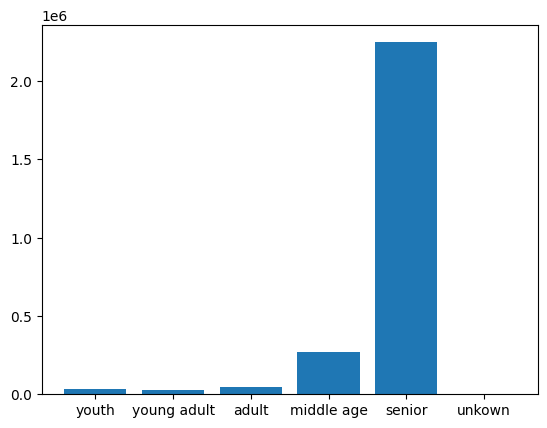

In [7]:
import matplotlib.pyplot as plt

plt.bar(newdf.index, newdf)
#since the senior column suprases the others by a lot the y axis represents in increments in 50,000
#so at 2.0 it represents 200000

## Question 2

In [1]:
import pandas as pd 
df = pd.read_csv("/anvil/projects/tdm/data/8451/The_Complete_Journey_2_Master/5000_transactions.csv")
df.columns = ["BASKET_NUM", "HSHD_NUM", "PURCHASE", "PRODUCT_NUM", "SPEND", "UNITS", "STORE_R", "WEEK_NUM", "YEAR"]
df.head()

,BASKET_NUM,HSHD_NUM,PURCHASE,PRODUCT_NUM,SPEND,UNITS,STORE_R,WEEK_NUM,YEAR
0,24,1809,03-JAN-16,5817389,-1.50,-1,SOUTH,1,2016
1,24,1809,03-JAN-16,5829886,-1.50,-1,SOUTH,1,2016
2,34,1253,03-JAN-16,539501,2.19,1,EAST,1,2016
3,60,1595,03-JAN-16,5260099,0.99,1,WEST,1,2016
4,60,1595,03-JAN-16,4535660,2.50,2,WEST,1,2016


Markdown notes and sentences and analysis written here.

In [2]:
df.groupby(['YEAR', 'STORE_R'])['SPEND'].sum()
#we are grouping by each year and each store region 
#.sum() counts the all the money spent in each region 

YEAR  STORE_R
2016  CENTRAL    4471800.64
      EAST       5829165.51
      SOUTH      3996750.91
      WEST       4754002.95
2017  CENTRAL    4425504.50
      EAST       5870281.35
      SOUTH      3961169.86
      WEST       4926103.59
Name: SPEND, dtype: float64

In [12]:
print(df['YEAR'].unique())
#I used this code to make sure there were only 2 years in YEAR

[2016 2017]


## Question 3

In [5]:
import pandas as pd 
df = pd.read_csv('/anvil/projects/tdm/data/beer/reviews_sample.csv')
df.head()

,beer_id,username,date,text,look,smell,taste,feel,overall,score
0,271781,bluejacket74,2017-03-17,"750 ml bottle, 2016 vintage, bottle #304 of...",4.00,4.00,4.00,4.25,4.00,4.03
1,125646,_dirty_,2017-12-21,,4.50,4.50,4.50,4.50,4.50,4.50
2,125646,CJDUBYA,2017-12-21,,4.75,4.75,4.75,4.75,4.75,4.75
3,125646,GratefulBeerGuy,2017-12-20,0% 16 oz can. Funny story: As I finally wal...,4.75,4.75,4.50,4.50,4.50,4.58
4,125646,LukeGude,2017-12-20,Classic TH NEIPA. Overflowing head and bouq...,4.25,4.50,4.25,4.25,4.25,4.31


In [6]:
df['year'] = pd.to_datetime(df['date']).dt.year
#this code extracts the year from each row in the date column and creates a new year column

In [8]:
df['month'] = pd.to_datetime(df['date']).dt.month
#extracts the month from each row in the date column to create a new month column

In [9]:
pd.set_option('display.max_rows', None)
#making sure to display all data

In [11]:
df.groupby(['year', 'month'])['score'].mean()
#Finally we group by the year and month 
#We are taking the mean value of each month according to score
#This gives us the mean value for each month described by each year

year  month
1998  1        3.770000
      2        3.396667
      3        4.092000
      4        3.840000
      5        3.702000
      6        4.700000
      7        3.100000
      8        3.823333
      9        3.355000
      10       3.910000
      12       3.930000
1999  2        3.613333
      5        3.820000
      6        3.850000
      7        3.880000
      10       3.500000
      11       3.880000
      12       4.000000
2000  2        4.300000
      4        3.880000
      6        4.470000
      7        3.995000
      9        3.885000
      10       3.880000
      11       4.670000
      12       3.400000
2001  1        4.220000
      2        4.488000
      3        4.403333
      4        3.053333
      6        4.012000
      7        4.080000
      8        3.905455
      9        4.010556
      10       3.948000
      11       4.112069
      12       3.851053
2002  1        4.246667
      2        3.706000
      3        3.933846
      4        3.831224
    

## Question 4

In [29]:
import pandas as pd

myDF = pd.read_csv("/anvil/projects/tdm/data/election/itcont1980.txt", header=None, sep='|')

myDF.columns = ["CMTE_ID", "AMNDT_IND", "RPT_TP", "TRANSACTION_PGI", "IMAGE_NUM", "TRANSACTION_TP", "ENTITY_TP", "NAME", "CITY", "STATE", "ZIP_CODE", "EMPLOYER", "OCCUPATION", "TRANSACTION_DT", "TRANSACTION_AMT", "OTHER_ID", "TRAN_ID", "FILE_NUM", "MEMO_CD", "MEMO_TEXT", "SUB_ID"]
myDF.head()

,CMTE_ID,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,...,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,OTHER_ID,TRAN_ID,FILE_NUM,MEMO_CD,MEMO_TEXT,SUB_ID
0,C00078279,A,M11,P,80031492155,22Y,NaN,"MCKENNON, K R",MIDLAND,MI,...,NaN,NaN,10031979.0,400,NaN,NaN,NaN,NaN,CONTRIBUTION REF TO INDIVIDUAL,3062020110011466469
1,C00078279,A,M11,NaN,79031415137,15,NaN,"OREFFICE, P",MIDLAND,MI,...,DOW CHEMICAL CO,NaN,10261979.0,1500,NaN,NaN,NaN,NaN,NaN,3061920110000382948
2,C00078279,A,M11,NaN,79031415137,15,NaN,"DOWNEY, J",MIDLAND,MI,...,DOW CHEMICAL CO,NaN,10261979.0,300,NaN,NaN,NaN,NaN,NaN,3061920110000382949
3,C00078279,A,M11,NaN,79031415137,15,NaN,"BLAIR, E",MIDLAND,MI,...,DOW CHEMICAL CO,NaN,10261979.0,1000,NaN,NaN,NaN,NaN,NaN,3061920110000382950
4,C00078287,A,Q1,NaN,79031231889,15,NaN,"BLANCHARD, JOHN A",CHICAGO,IL,...,NaN,NaN,3201979.0,200,NaN,NaN,NaN,NaN,NaN,3061920110000383914


In [15]:
indianaDF = myDF[myDF['STATE'] == 'IN']
indianaDF.head()
#making a subset of all the rows that are from indiana 

,CMTE_ID,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,...,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,OTHER_ID,TRAN_ID,FILE_NUM,MEMO_CD,MEMO_TEXT,SUB_ID
21,C00003079,N,Q2,NaN,79031314186,15,NaN,"STANJEVICH, TODOR",GARY,IN,...,EASY LIVING INC,NaN,5221979.0,1000,NaN,NaN,NaN,NaN,NaN,3061920110000494723
639,C00002469,N,M11,NaN,79031411077,15,NaN,"ARTHUR, CHARLES",GREENWOOD,IN,...,INT'L ASSOC OF MACHINISTS,NaN,10221979.0,200,NaN,NaN,NaN,NaN,NaN,3061920110000502038
654,C00103572,N,Q2,NaN,79031312877,15,NaN,"LINKOUS, REX D",INDIANAPOLIS,IN,...,GENERAL AGENT,NaN,6111979.0,200,NaN,NaN,NaN,NaN,NaN,3061920110000426435
671,C00103572,N,Q3,NaN,79031391832,15,NaN,"RUMMEL, CARLETON J",EVANSVILLE,IN,...,NaN,NaN,7231979.0,200,NaN,NaN,NaN,NaN,NaN,3061920110000426444
683,C00103572,N,YE,NaN,80031471860,15,NaN,"MALLON, DALE E",MUNCIE,IN,...,GENERAL AGENT,NaN,10191979.0,300,NaN,NaN,NaN,NaN,NaN,3061920110000426456


In [27]:
indianaDF['CITY'].value_counts(ascending=True).tail(41)
# we create a basic table by looking at the CITY column and counting how many times each city is called
#We change to ascending then grap the top 41 rows

CITY
WALKERTON           15
CHESTERTON          15
PLAINFIELD          15
INDIANPOLIS         15
MISHAWAKA           16
MICHIGAN CITY       16
HIGHLAND            16
HOBART              17
VINCENNES           20
WARSAW              21
HAMMOND             22
W LAFAYETTE         22
NOBLESVILLE         22
WEST LAFAYETTE      24
SYRACUSE            24
WABASH              27
MUNSTER             30
MUNICE              31
VALPARAISO          34
ANDERSON            34
CROWN POINT         35
GREENWOOD           35
BLOOMINGTON         38
RICHMOND            43
COLUMBUS            45
KOKOMO              45
MERRILLVILLE        46
GARY                47
ZIONSVILLE          52
LAPORTE             53
TERRE HAUTE         75
LAFAYETTE           85
INDPLS             123
SOUTH BEND         123
ELKHART            132
FT WAYNE           132
EVANSVILLE         151
FORT WAYNE         157
CARMEL             167
MUNCIE             232
INDIANAPOLIS      1443
Name: count, dtype: int64

In [32]:
myDF['CITY'][myDF['STATE'] == 'IN'].value_counts(ascending=True).tail(41)

CITY
WALKERTON           15
CHESTERTON          15
PLAINFIELD          15
INDIANPOLIS         15
MISHAWAKA           16
MICHIGAN CITY       16
HIGHLAND            16
HOBART              17
VINCENNES           20
WARSAW              21
HAMMOND             22
W LAFAYETTE         22
NOBLESVILLE         22
WEST LAFAYETTE      24
SYRACUSE            24
WABASH              27
MUNSTER             30
MUNICE              31
VALPARAISO          34
ANDERSON            34
CROWN POINT         35
GREENWOOD           35
BLOOMINGTON         38
RICHMOND            43
COLUMBUS            45
KOKOMO              45
MERRILLVILLE        46
GARY                47
ZIONSVILLE          52
LAPORTE             53
TERRE HAUTE         75
LAFAYETTE           85
INDPLS             123
SOUTH BEND         123
ELKHART            132
FT WAYNE           132
EVANSVILLE         151
FORT WAYNE         157
CARMEL             167
MUNCIE             232
INDIANAPOLIS      1443
Name: count, dtype: int64

In [ ]:
#I think both of my versions are exactly the same
#the only difference betweeen them is the code 
# i can say i think the second version is more efficient 

## Question 5

In [1]:
import pandas as pd 
df = pd.read_csv('/anvil/projects/tdm/data/flights/subset/1990.csv')

In [3]:
pd.cut(df['DepDelay'], bins=[-float('inf')] + list(range(0, 1441, 60))).value_counts(dropna = False).sort_index()
#We cut the DepDelay column according to the time it left
#negative intervals mean the flight left early 
#positive intervals means it left late
#it incriments 

DepDelay
(-inf, 0.0]         2966433
(0.0, 60.0]         2111783
(60.0, 120.0]        104240
(120.0, 180.0]        24000
(180.0, 240.0]         7517
(240.0, 300.0]         2630
(300.0, 360.0]         1001
(360.0, 420.0]          366
(420.0, 480.0]          125
(480.0, 540.0]           65
(540.0, 600.0]           35
(600.0, 660.0]           19
(660.0, 720.0]           24
(720.0, 780.0]           20
(780.0, 840.0]           24
(840.0, 900.0]           13
(900.0, 960.0]            8
(960.0, 1020.0]           6
(1020.0, 1080.0]          1
(1080.0, 1140.0]          4
(1140.0, 1200.0]          3
(1200.0, 1260.0]          3
(1260.0, 1320.0]         11
(1320.0, 1380.0]         28
(1380.0, 1440.0]         76
NaN                   52458
Name: count, dtype: int64

Markdown notes and sentences and analysis written here.

## Pledge

By submitting this work I hereby pledge that this is my own, personal work. I've acknowledged in the designated place at the top of this file all sources that I used to complete said work, including but not limited to: online resources, books, and electronic communications. I've noted all collaboration with fellow students and/or TA's. I did not copy or plagiarize another's work.

> As a Boilermaker pursuing academic excellence, I pledge to be honest and true in all that I do. Accountable together – We are Purdue.